In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

'h:\\Codes\\PythonWorkspace\\CSE5005-Project\\pictures'

In [6]:
df_btc_price_1s=pd.read_csv("./prices_btc_1s.txt", sep="\s+", names=["timestamp", "price"])

df_btc_price_1s

,timestamp,price
0,1621357598,43471.12
1,1621357599,43454.97
2,1621357600,43459.46
3,1621357602,43463.00
4,1621357603,43454.97
...,...,...
210824,1621618170,36956.38
210825,1621618171,36956.38
210826,1621618172,36954.31
210827,1621618174,36948.84


In [15]:
df_btc_price_1s.iloc[df_btc_price_1s["price"].idxmin()]

timestamp    1.621430e+09
price        3.072455e+04
Name: 59139, dtype: float64

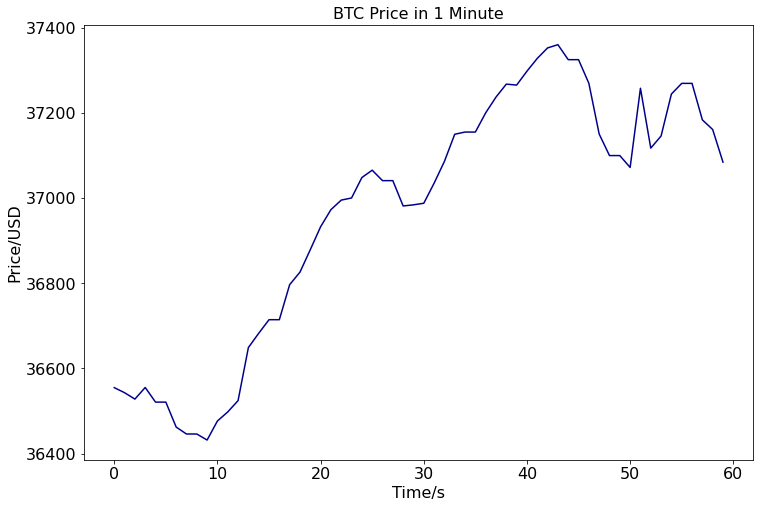

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(range(60), df_btc_price_1s[58800:58860]["price"], color="darkblue")
plt.title("BTC Price in 1 Minute", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Time/s", size=16)
plt.ylabel("Price/USD", size=16)
plt.savefig("BTCPrice.png", dpi=300, bbox_inches="tight")
plt.show();

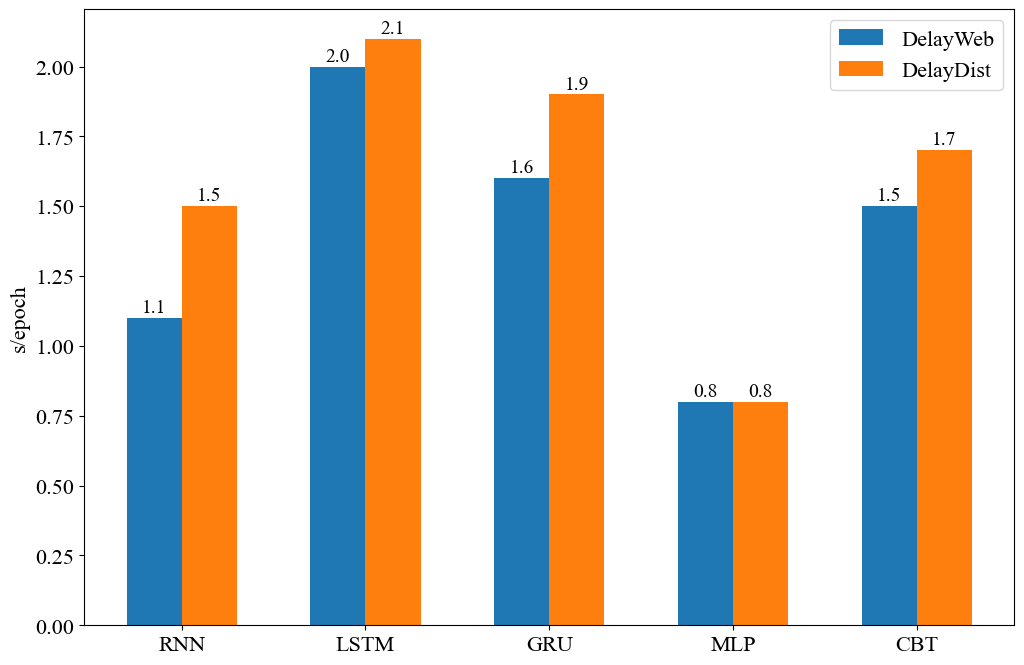

In [9]:
delayweb_list=[1.1, 2.0, 1.6, 0.8, 1.5]
delaydist_list=[1.5, 2.1, 1.9, 0.8, 1.7]
labels=["RNN", "LSTM", "GRU", "MLP", "CBT"]

def set_label(rects):
    for rect in rects:
        height = rect.get_height() # 获取⾼度
        plt.text(x = rect.get_x() + rect.get_width()/2, # ⽔平坐标
                 y = height + 0.02, # 竖直坐标
                 s = height, # ⽂本
                 ha = 'center', # ⽔平居中
                 fontsize=14, 
                 fontproperties = "Times New Roman")
        
        
x = np.arange(len(delayweb_list))

plt.figure(figsize=(12, 8))
plt.yticks(fontproperties = "Times New Roman", size = 16)
plt.xticks(np.arange(len(delayweb_list)), labels, fontproperties = "Times New Roman", size = 16)
plt.ylabel("s/epoch", fontdict={"family" : "Times New Roman", "size": 16})

width=0.3
bar1=plt.bar(x-width/2, delayweb_list, width)
bar2=plt.bar(x+width/2, delaydist_list, width)
plt.legend(["DelayWeb", "DelayDist"], prop={"family" : "Times New Roman", "size": 16}, loc="best")
 
set_label(bar1)
set_label(bar2)

plt.savefig("train_time.png", dpi=300, bbox_inches='tight')
plt.show();

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
embedding_matrix=np.load("../cross_sectional_model/saved/embedding_matrix.npy")

embedding_matrix

array([[-1.0818675 ,  1.1719983 , -2.6844268 , ..., -0.4084267 ,
        -1.989471  , -1.6296493 ],
       [ 0.7692086 , -0.4697535 , -0.5705063 , ..., -0.09847809,
        -2.4168925 ,  0.6546486 ],
       [ 1.5920142 ,  0.713723  ,  1.0265652 , ..., -0.5408429 ,
        -3.201592  , -0.879126  ],
       ...,
       [ 0.27889717, -0.47974297, -1.9099721 , ..., -0.7414379 ,
         0.6047523 ,  0.20391487],
       [ 2.0364363 , -0.14823285, -1.7277429 , ..., -0.8948788 ,
        -1.9245988 ,  0.751065  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [3]:
cor_matrix=embedding_matrix @ embedding_matrix.T

for i in range(len(cor_matrix)):
    cor_matrix[i][i]=0

scaler=MinMaxScaler()
cor_matrix=scaler.fit_transform(cor_matrix.T).T

for i in range(len(cor_matrix)):
    cor_matrix[i][i]=1
cor_matrix

array([[1.        , 0.62320834, 0.59167045, ..., 0.60957557, 0.67467666,
        0.5130835 ],
       [0.67290044, 1.        , 0.87748563, ..., 0.42651248, 0.85276985,
        0.47604704],
       [0.5870781 , 0.7422662 , 1.        , ..., 0.3068819 , 0.714952  ,
        0.5035387 ],
       ...,
       [0.69501054, 0.45122334, 0.14249715, ..., 1.        , 0.6493806 ,
        0.5056147 ],
       [0.6363575 , 0.69862735, 0.68359256, ..., 0.5244379 , 1.        ,
        0.43165144],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

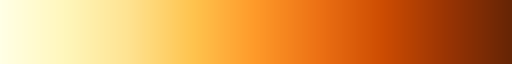

In [12]:
colormap=plt.cm.get_cmap("YlOrBr")

colormap

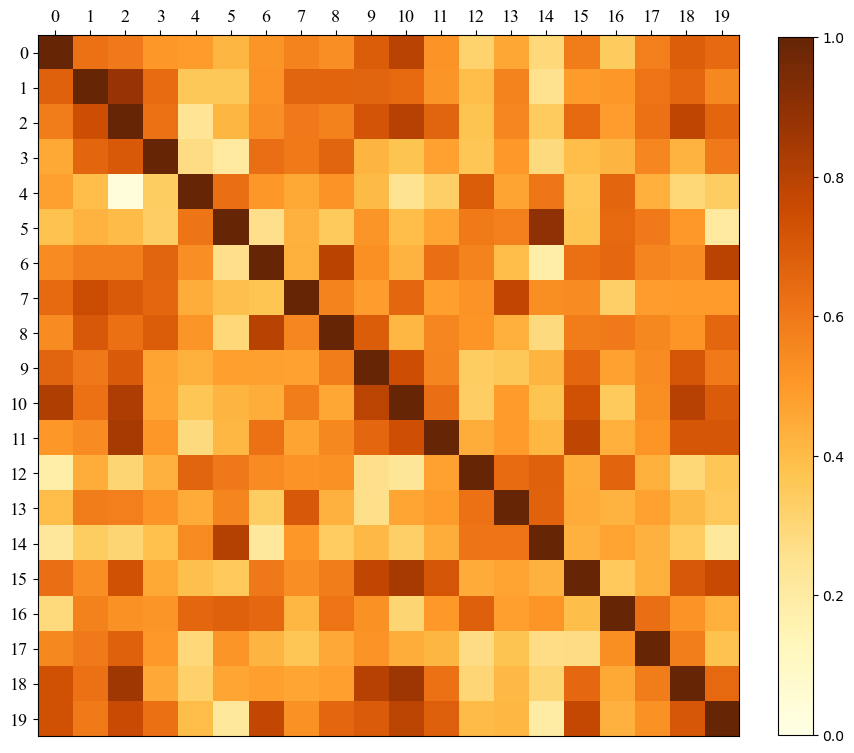

In [13]:
start=0
end=20
cor_matrix_sub=cor_matrix[start:end, start:end]

plt.figure(figsize=(10, 10))
plt.imshow(cor_matrix_sub, cmap=colormap, vmin=0, vmax=1)
plt.xticks(range(end-start), list(map(str, range(start, end))), fontproperties = "Times New Roman", size = 13)
plt.yticks(range(end-start), list(map(str, range(start, end))), fontproperties = "Times New Roman", size = 13)
plt.gca().xaxis.set_ticks_position("top")
plt.colorbar(fraction=0.045)
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show();

In [16]:
df_user=pd.read_csv("../data/user_distr.csv")

df_20=df_user[:20]

df_20

,user_id,address,mean
0,0,1AqpKb6FWLbA3SSHXCahDEgyncDz9xEqXB,271.471995
1,1,1H3kdzkeBUB17LZDXUNco36JJeAkC4A8D,186.426692
2,2,1Hx79ZQpYfGw2JxJAhENrZ8pbPQdd3qMPn,176.521015
3,3,14SvZvup9FFYLUoN5Mqar4JMhWL1kQuphq,97.058073
4,4,1MzBGfaPMNFdP18uMSAi3cCPj8H2g69XNe,74.477938
5,5,1JuqZyAhN2JXFjBsqfMg9oegayxQAPY64Z,49.860146
6,6,12GK8jTxofde9vuGaphs1GurubAQfwHnE8,161.320632
7,7,1FA2KNVpoZoWx1S89M2mGgkCGwVLyA52Uj,119.372223
8,8,1L1NpMCVqvp4z6FjMF3qAiqNvsrysBFe9t,121.393172
9,9,1Ct89q2h3nMxA5eccX6bsJ3vMNsk6r3mVa,312.258573


In [27]:
df_20["error_with_19"]=abs(df_20["mean"]-df_20.at[19, "mean"])

df_20[["user_id", "mean", "error_with_19"]]

C:\Users\60125\AppData\Local\Temp\ipykernel_9600\3911382376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20["error_with_19"]=abs(df_20["mean"]-df_20.at[19, "mean"])


,user_id,mean,error_with_19
0,0,271.471995,118.237501
1,1,186.426692,33.192198
2,2,176.521015,23.286522
3,3,97.058073,56.176420
4,4,74.477938,78.756555
5,5,49.860146,103.374347
6,6,161.320632,8.086139
7,7,119.372223,33.862270
8,8,121.393172,31.841322
9,9,312.258573,159.024079


In [34]:
scaler=MinMaxScaler()
errors=scaler.fit_transform(df_20["error_with_19"].values.reshape(-1, 1))

errors_1m=1-errors
errors_1m=errors_1m.T

errors_1m

array([[0.25648052, 0.79127565, 0.85356606, 0.64674268, 0.50475076,
        0.34994532, 0.94915148, 0.787062  , 0.79977044, 0.        ,
        0.856328  , 0.95097435, 0.26834126, 0.33052599, 0.04861139,
        0.45852341, 0.78264269, 0.89498323, 0.03274773, 1.        ]])

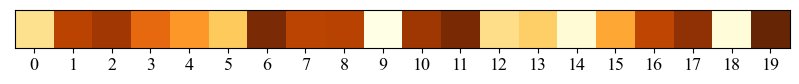

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(errors_1m, cmap=colormap, vmin=0, vmax=1)
plt.yticks([])
plt.xticks(range(end-start), list(map(str, range(start, end))), fontproperties = "Times New Roman", size = 13)
plt.gca().xaxis.set_ticks_position("bottom")
plt.savefig("errors.png", dpi=300, bbox_inches="tight")
plt.show();